In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyspark

In [8]:
feedback = pd.read_csv("chatjoin.csv", encoding='latin1')
score = pd.read_csv("enrolments.csv")

In [9]:
feedback.head()

,user_id,id,created_at,content,was_student,already_passed,post_type
0,65f59a3a9e7f38f1d65f277d533502ce,249483,1533724154,Thank you!,True,True,MESSAGE
1,65f59a3a9e7f38f1d65f277d533502ce,249479,1533723993,It seems like it might be trying to draw both ...,False,False,MESSAGE
2,65f59a3a9e7f38f1d65f277d533502ce,249472,1533723722,It still doesn't seem to work properly when I ...,True,False,MESSAGE
3,65f59a3a9e7f38f1d65f277d533502ce,249466,1533723347,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE
4,65f59a3a9e7f38f1d65f277d533502ce,249464,1533723172,I'm having trouble with coding the last part. ...,True,False,MESSAGE


In [11]:
feedback['num_feedback'] = feedback.groupby('user_id')['user_id'].transform('count')
feedback.head()

,user_id,id,created_at,content,was_student,already_passed,post_type,num_feedback
0,65f59a3a9e7f38f1d65f277d533502ce,249483,1533724154,Thank you!,True,True,MESSAGE,99
1,65f59a3a9e7f38f1d65f277d533502ce,249479,1533723993,It seems like it might be trying to draw both ...,False,False,MESSAGE,99
2,65f59a3a9e7f38f1d65f277d533502ce,249472,1533723722,It still doesn't seem to work properly when I ...,True,False,MESSAGE,99
3,65f59a3a9e7f38f1d65f277d533502ce,249466,1533723347,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,99
4,65f59a3a9e7f38f1d65f277d533502ce,249464,1533723172,I'm having trouble with coding the last part. ...,True,False,MESSAGE,99


In [12]:
# merge two dataset
data = feedback.merge(score, on="user_id", how="outer")
data.head()

,user_id,id,created_at_x,content,was_student,already_passed,post_type,num_feedback,created_at_y,assigned_at,slug,role,is_tutor,grade,gender,score,coursebookmark,institution_id
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85


In [82]:
data['questionAsked'] = data['content'].apply(lambda x: 1 if pd.notnull(x) else 0)
data['pass_rate'] = data.groupby('user_id')['already_passed'].transform(lambda x: x.sum() / x.count())
data.head()

/var/folders/98/hmd0zwqx0gd9hypyfb0brb540000gn/T/ipykernel_45864/2634035264.py:2: RuntimeWarning: invalid value encountered in long_scalars
  data['pass_rate'] = data.groupby('user_id')['already_passed'].transform(lambda x: x.sum() / x.count())


,user_id,id,created_at_x,content,was_student,already_passed,post_type,num_feedback,created_at_y,assigned_at,slug,role,is_tutor,grade,gender,score,coursebookmark,institution_id,questionAsked,pass_rate
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,0.111111
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,0.111111
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,0.111111
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,0.111111
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,99.0,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1,0.111111


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33082 entries, 0 to 33081
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         33082 non-null  object 
 1   id              21457 non-null  float64
 2   created_at_x    21457 non-null  float64
 3   content         21457 non-null  object 
 4   was_student     21457 non-null  object 
 5   already_passed  21457 non-null  object 
 6   post_type       21457 non-null  object 
 7   num_feedback    21457 non-null  float64
 8   created_at_y    33082 non-null  int64  
 9   assigned_at     16063 non-null  float64
 10  slug            33082 non-null  object 
 11  role            33082 non-null  object 
 12  is_tutor        33082 non-null  bool   
 13  grade           32139 non-null  float64
 14  gender          31330 non-null  object 
 15  score           33082 non-null  int64  
 16  coursebookmark  33082 non-null  bool   
 17  institution_id  32857 non-null 

In [83]:
correlation = data[['score', 'num_feedback', 'questionAsked']].corr(method='spearman')

print(correlation)

                  score  num_feedback  questionAsked
score          1.000000      0.247214       0.562522
num_feedback   0.247214      1.000000            NaN
questionAsked  0.562522           NaN       1.000000


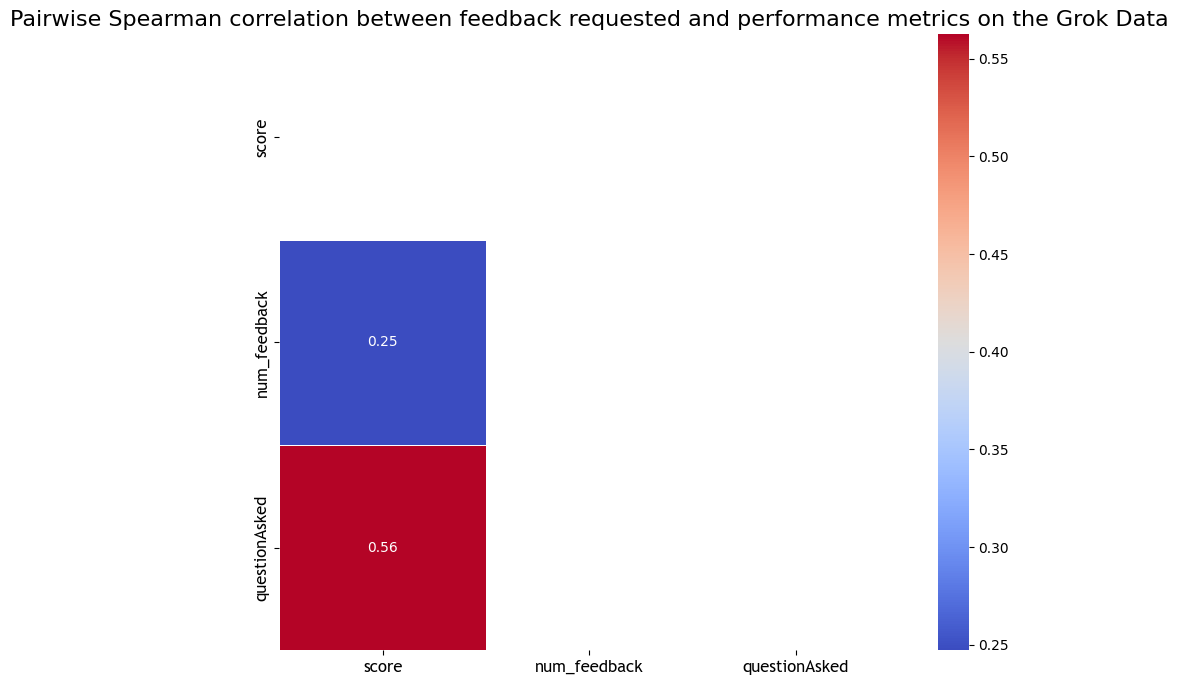

In [77]:
# Create a mask for upper triangular portion
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a correlation heatmap with improved theme
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)

# Set the title of the plot
plt.title('Pairwise Spearman correlation between feedback requested and performance metrics on the Grok Data', fontsize=16)

# # Customize the colorbar
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=12)

# Set the font size of the annotations
plt.xticks(fontsize=12, fontfamily="Trebuchet MS")
plt.yticks(fontsize=12, fontfamily="Trebuchet MS")

# Display the plot
plt.show()

In [80]:
# --------------------- RQ_2 Starts Here ---------------------
reduced = data[["user_id", "questionAsked", "num_feedback", "score", "pass_rate"]].copy().groupby("user_id").first().reset_index()
reduced.fillna(0, inplace=True)
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        12898 non-null  object 
 1   questionAsked  12898 non-null  int64  
 2   num_feedback   12898 non-null  float64
 3   score          12898 non-null  int64  
 4   pass_rate      12898 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 504.0+ KB


In [81]:
reduced.head()

,user_id,questionAsked,num_feedback,score,pass_rate
0,0008c93cbc047666cab8ec9b06e7fb43,1,3.0,399,0.333333
1,00093daf36073e2aeb7b2723135c21d1,0,0.0,339,0.000000
2,000b51052a5e303dcefc14e077044865,1,20.0,200,0.100000
3,000c11bdc5aa25d11cb9d5c7b268b13b,0,0.0,0,0.000000
4,0017e1dfb8022a9cc4376edf1a72249d,0,0.0,0,0.000000


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


# Assuming your DataFrame is named "df"
X = reduced[['num_feedback']]  # Features
y = reduced['score']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 20857.59731560934
R-squared Score: 0.08647705966740693


In [85]:
# --------------------- RQ_2 Starts Here ---------------------
filter_nonAsked = reduced[reduced['questionAsked'] != 0]
filter_nonAsked.head()

,user_id,questionAsked,num_feedback,score,pass_rate
0,0008c93cbc047666cab8ec9b06e7fb43,1,3.0,399,0.333333
2,000b51052a5e303dcefc14e077044865,1,20.0,200,0.100000
6,0021f5a039370431c495ecbf719ac6ca,1,1.0,84,0.000000
13,003c4047ee396a6cfa83dc98b8351125,1,1.0,210,0.000000
23,007bfc0f9d2d037021cb896295b1b1e0,1,8.0,240,0.375000
